In [1]:
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Data\RE__Data_for_Degradation\Calendar_ageing_60degC_SOC_100_resistance_increase.xlsx")
dff = pd.read_excel("Data\RE__Data_for_Degradation\Calendar_ageing_60degC_SOC_100.xlsx")

In [5]:
df


,Time(h),Resistance increase[%]
0,4.468069,0.182392
1,178.835950,3.834838
2,339.799639,6.940109
3,679.664832,11.876575
4,1010.635584,15.173212
5,1350.423312,22.477620
6,1681.340304,27.413600
7,2016.761376,31.439077


In [6]:
R = df['Resistance increase[%]']
TimeR = df['Time(h)']
S = dff['Capacity loss %']
TImeC = dff['Time(h)']

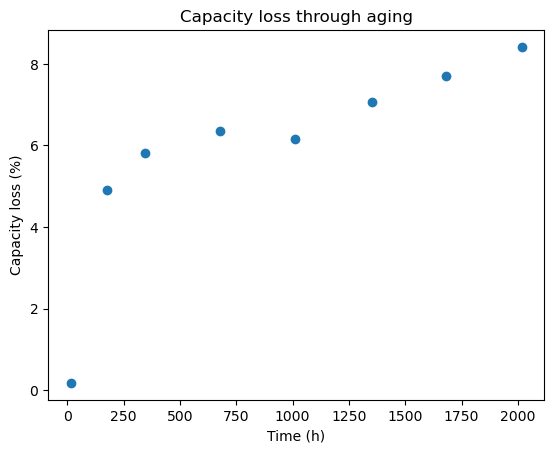

R² = 0.8830176008953805
Y = 2698.9846190741564 *x*np.exp(-Ec/(R*T))
Tau = 2003.5482318980035 µs
0.3035701082392466


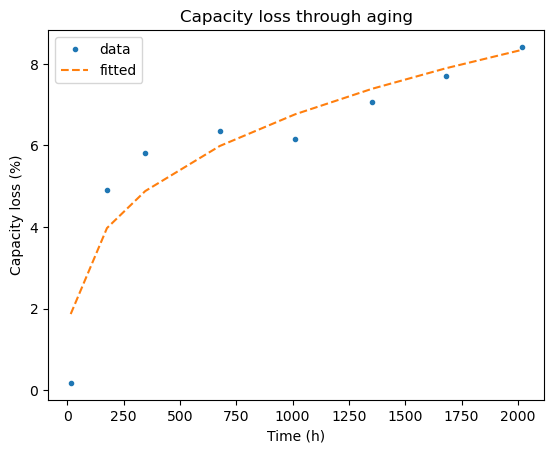

In [7]:


SO = [0.18154,4.91308,5.81923,6.35671,6.16548, 7.067024,7.69559,8.4151]

SO = np.array(SO)
TimeS =  [14.622258,175.7819952,345.628332  ,676.30164,1011.395616,1351.028952,1681.708224,2016.861504]
TimeS = np.array(TimeS)

plt.figure()
plt.scatter(TimeS,SO)
plt.ylabel("Capacity loss (%)")
plt.xlabel("Time (h)")
plt.title("Capacity loss through aging")
plt.show()
T = 60+273.15
Ec = 22406
Rcg = 8.314

def monoExp(x, m,zo):
    return m *x**zo*np.exp(-Ec/(Rcg*T))


# perform the fit
p0 = (100,0.5) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp,TimeS,SO, p0)
m,zo = params
sampleRate = 20_000 # Hz
tauSec = (1 / Rcg*T) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(SO - monoExp(TimeS, m,zo))
squaredDiffsFromMean = np.square(SO - np.mean(SO))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(TimeS, SO, '.', label="data")
plt.plot(TimeS, monoExp(TimeS, m,zo), '--', label="fitted")
plt.ylabel("Capacity loss (%)")
plt.xlabel("Time (h)")
plt.title("Capacity loss through aging")

plt.legend()
# inspect the parameters
print(f"Y = {m} *x*np.exp(-Ec/(R*T))")
print(f"Tau = {tauSec * 1e6} µs")
ac = m 
z = zo
print(z)

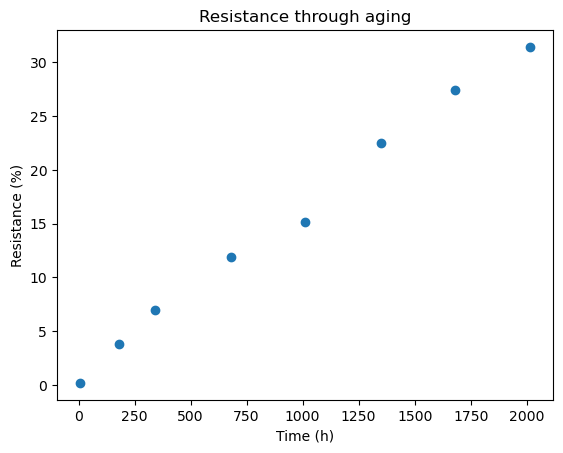

R² = 0.9923538970368908
Y = [2128324.04392186] *x*np.exp(-Ec/(R*T))
Tau = 2003.5482318980035 µs
[2128324.04392186]


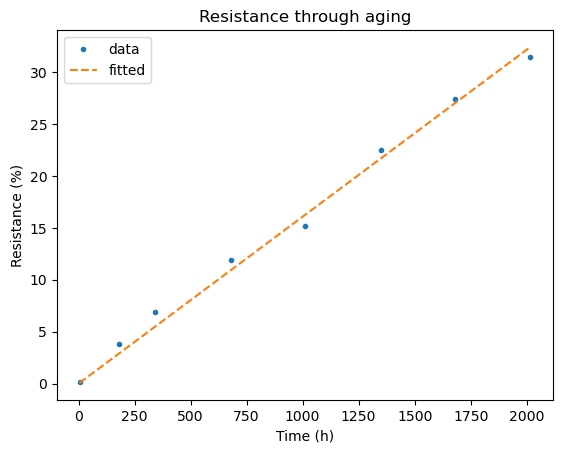

In [8]:

Cycle1 = np.array(TimeR)
R = [0.18239191,3.8348384,6.940109,11.876575,15.173212, 22.47762,27.4136,31.439077]

R = np.array(R)
TimeR =  [4.4680692,178.8359496,339.7996392  ,679.664832,1010.635584,1350.423312,1681.340304,2016.761376]
TimeR = np.array(TimeR)
Cycle1 = np.array(TimeR)
plt.figure()
plt.scatter(TimeR,R)
plt.ylabel("Resistance (%)")
plt.xlabel("Time (h)")
plt.title("Resistance through aging")
plt.show()
T = 60+273.15
Ec2 = 51800
Rcg = 8.314

def monoExp(x, m):
    return m *x*np.exp(-Ec2/(Rcg*T))


# perform the fit
p0 = (100) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp,Cycle1,R, p0)
m = params
sampleRate = 20_000 # Hz
tauSec = (1 / Rcg*T) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(R - monoExp(Cycle1, m))
squaredDiffsFromMean = np.square(R - np.mean(R))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(Cycle1, R, '.', label="data")
plt.plot(Cycle1, monoExp(Cycle1, m), '--', label="fitted")
plt.ylabel("Resistance (%)")
plt.xlabel("Time (h)")
plt.title("Resistance through aging")

plt.legend()
# inspect the parameters
print(f"Y = {m} *x*np.exp(-Ec/(R*T))")
print(f"Tau = {tauSec * 1e6} µs")
bc = m 
print(bc)

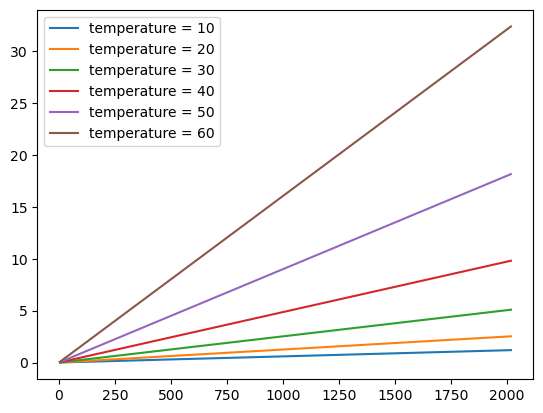

In [9]:
Temp = [10,20,30,40,50,60]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15

Rinc = []
plt.figure()

for k in range(6) :
    
    Rinc.append((bc *TimeR )*np.exp(-Ec2/(8.314*Temp[k])))
    plt.plot(TimeR, Rinc[k],label = "temperature = "+str(T0[k]))
plt.legend()    
plt.show() 

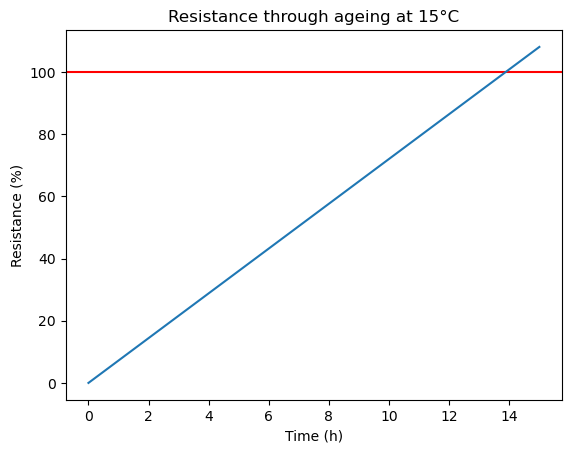

In [10]:
plt.figure()
Tempsannee = np.linspace(0,15,10)
Rinc1=((bc *Tempsannee*365*0.95*24)*np.exp(-Ec2/(8.314*(273.15+15))))
plt.axhline(y=100, color='r', linestyle='-')
plt.plot(Tempsannee, Rinc1,label = "temperature = "+str(T0[k]))
plt.ylabel("Resistance (%)")
plt.xlabel("Time (h)")
plt.title("Resistance through ageing at 15°C")
plt.show() 

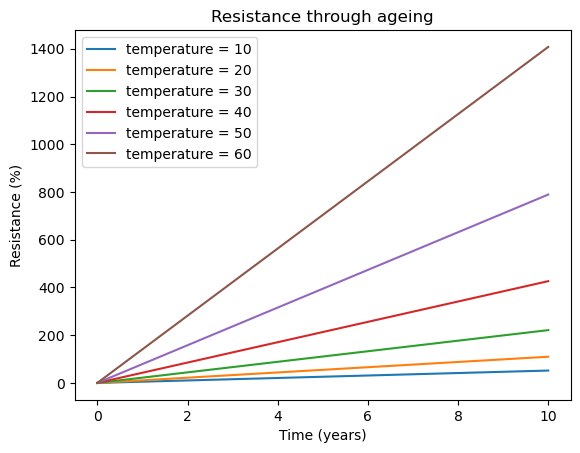

In [11]:
Temp = [10,20,30,40,50,60]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15
time10 = np.linspace(0,10,100)
Rinc = []
plt.figure()

for k in range(6) :
    
    Rinc.append((bc *time10*365*24 )*np.exp(-Ec2/(8.314*Temp[k])))
    plt.plot(time10, Rinc[k],label = "temperature = "+str(T0[k]))
plt.legend() 
plt.ylabel("Resistance (%)")
plt.xlabel("Time (years)")

plt.title("Resistance through ageing")
plt.show() 

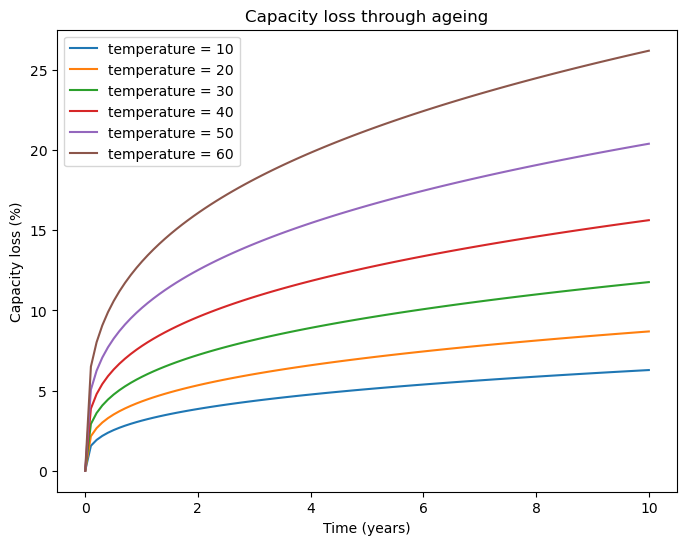

In [12]:
Temp = [10,20,30,40,50,60]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15
time10 = np.linspace(0,10,100)
Rinc = []
plt.figure(figsize = (8,6))

for k in range(6) :
    
    Rinc.append(ac*(365*24)**z*(time10)**z*np.exp(-Ec/(8.314*Temp[k])))
    plt.plot(time10, Rinc[k],label = "temperature = "+str(T0[k]))
plt.legend() 
plt.ylabel("Capacity loss (%)")
plt.xlabel("Time (years)")
plt.title("Capacity loss through ageing")
plt.show() 

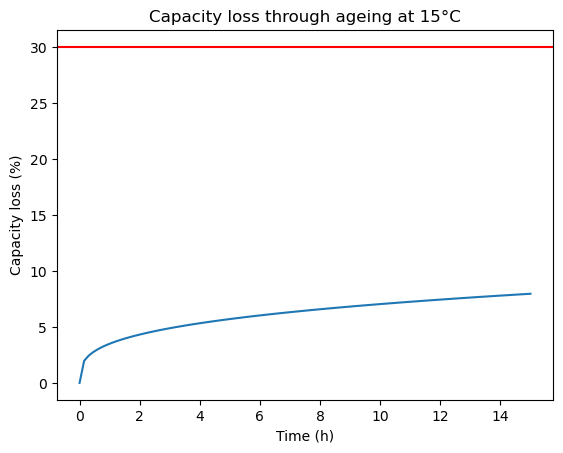

In [13]:
plt.figure()
Tempsannee = np.linspace(0,15,100)
Rinc1=0.95*ac*(365*24)**z*(Tempsannee)**z*np.exp(-Ec/(8.314*(273.15+15)))
plt.axhline(y=30, color='r', linestyle='-')
plt.plot(Tempsannee, Rinc1,label = "temperature = "+str(T0[k]))
plt.ylabel("Capacity loss (%)")
plt.xlabel("Time (h)")
plt.title("Capacity loss through ageing at 15°C")
plt.show() 

[28.6741171]
[19.30668673]
[13.17913794]
[9.11428853]
[8.00558304]


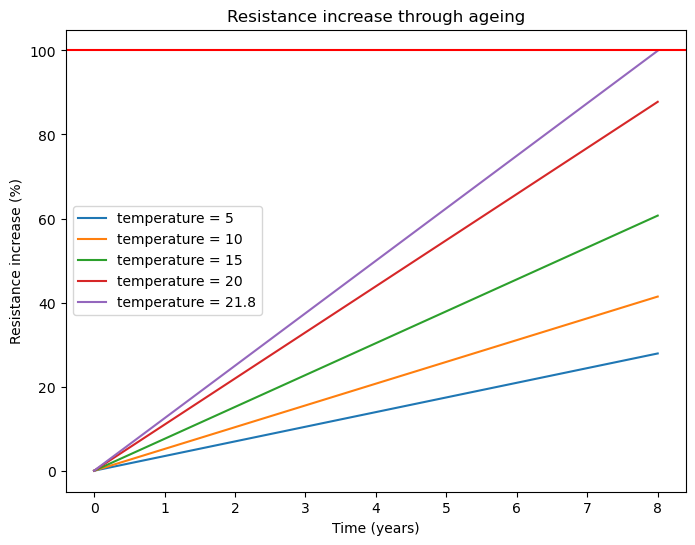

In [14]:
Temp = [5,10,15,20,21.8]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15
Tempsannee = np.linspace(0,8,10)
Rinc = []
plt.figure(figsize = (8,6))

for k in range(5) :
    print(100/((bc *365*24 )*np.exp(-Ec2/(8.314*Temp[k]))))
    Rinc.append((bc *Tempsannee*365*24 )*np.exp(-Ec2/(8.314*Temp[k])))
    plt.plot(Tempsannee, Rinc[k],label = "temperature = "+str(T0[k]))

plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel("Resistance increase (%)")
plt.xlabel("Time (years)")
plt.title("Resistance increase through ageing")
plt.legend()    
plt.show() 


3031.7433381598416
1725.5390698045949
1001.5015233492659
592.1588663787475
492.2384398408406


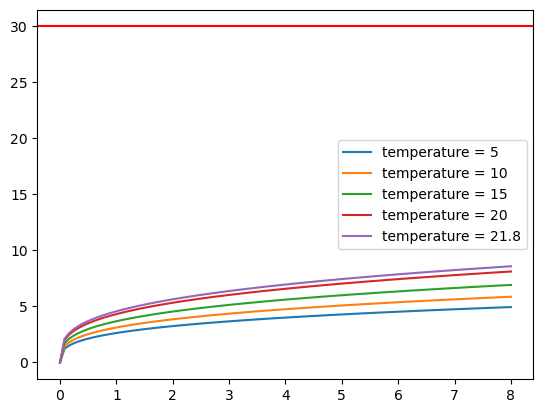

In [15]:
Temp = [5,10,15,20,21.8]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15
Tempsannee = np.linspace(0,8,100)
Rinc = []
plt.figure()

for k in range(5) :
    print((30/(ac*np.exp(-Ec/(8.314*Temp[k]))))**(1/z)*(1/(365*24)))
    Rinc.append(ac*(365*24)**z*(Tempsannee)**z*np.exp(-Ec/(8.314*Temp[k])))
    plt.plot(Tempsannee, Rinc[k],label = "temperature = "+str(T0[k]))
plt.axhline(y=30, color='r', linestyle='-')
plt.legend()    
plt.show() 